In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [15]:
nRowsRead = 500000
#nRowsRead = None
df1 = pd.read_csv("data/Chicago_Crimes_2001_to_2004.csv", delimiter=',', nrows = nRowsRead)
df2 = pd.read_csv("data/Chicago_Crimes_2005_to_2007.csv", delimiter=',', nrows = nRowsRead)
df3 = pd.read_csv("data/Chicago_Crimes_2008_to_2011.csv", delimiter=',', nrows = nRowsRead)
df4 = pd.read_csv("data/Chicago_Crimes_2012_to_2017.csv", delimiter=',', nrows = nRowsRead)

dataframe = []
dataframe.append(df1)
dataframe.append(df2)
dataframe.append(df3)
dataframe.append(df4)

In [16]:
result = pd.concat(dataframe, ignore_index=True)


In [17]:
result = result.drop([result.columns[0],'ID','District','Case Number','IUCR',
             'Description','FBI Code','X Coordinate', 'Y Coordinate', 'Ward', 'Updated On', 'Year', 'Beat'
             ,'Domestic', 'Location Description', 'Arrest', 'Block','Community Area'], axis = 1)
result

,Date,Primary Type,Latitude,Longitude,Location
0,01/01/2004 12:01:00 AM,THEFT,NaN,NaN,NaN
1,03/01/2003 12:00:00 AM,OTHER OFFENSE,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,06/20/2004 11:00:00 AM,OFFENSE INVOLVING CHILDREN,NaN,NaN,NaN
3,12/30/2004 08:00:00 PM,THEFT,NaN,NaN,NaN
4,05/01/2003 01:00:00 AM,THEFT,41.691785,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...
1999995,04/26/2013 10:25:00 AM,DECEPTIVE PRACTICE,41.722768,-87.624410,"(41.722768379, -87.624410361)"
1999996,04/26/2013 12:07:00 PM,NARCOTICS,41.764268,-87.643003,"(41.764268496, -87.643003179)"
1999997,04/26/2013 06:15:00 AM,NARCOTICS,41.656764,-87.547139,"(41.656764077, -87.547138923)"
1999998,04/26/2013 02:00:00 AM,THEFT,41.890782,-87.719842,"(41.890781894, -87.719841858)"


In [18]:
result = result.dropna()
from datetime import *
result['Date'] = pd.to_datetime(result['Date'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%d/%m/%Y %H:%M:%S')
result

C:\Users\minh\AppData\Local\Temp/ipykernel_14008/3517475896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Date'] = pd.to_datetime(result['Date'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%d/%m/%Y %H:%M:%S')


,Date,Primary Type,Latitude,Longitude,Location
1,01/03/2003 00:00:00,OTHER OFFENSE,41.817229,-87.637328,"(41.817229156, -87.637328162)"
4,01/05/2003 01:00:00,THEFT,41.691785,-87.635116,"(41.691784636, -87.635115968)"
6,01/01/2001 11:00:00,CRIM SEXUAL ASSAULT,41.687020,-87.608445,"(41.687020002, -87.60844523)"
7,15/03/2003 00:00:00,OTHER OFFENSE,41.729712,-87.653159,"(41.729712374, -87.653158513)"
9,01/01/2003 00:00:00,THEFT,41.869772,-87.708180,"(41.869772159, -87.708180162)"
...,...,...,...,...,...
1999995,26/04/2013 10:25:00,DECEPTIVE PRACTICE,41.722768,-87.624410,"(41.722768379, -87.624410361)"
1999996,26/04/2013 12:07:00,NARCOTICS,41.764268,-87.643003,"(41.764268496, -87.643003179)"
1999997,26/04/2013 06:15:00,NARCOTICS,41.656764,-87.547139,"(41.656764077, -87.547138923)"
1999998,26/04/2013 02:00:00,THEFT,41.890782,-87.719842,"(41.890781894, -87.719841858)"


In [2]:
result.to_csv('spark_preprocess.csv')

NameError: name 'result' is not defined

In [7]:
result.isnull().sum()

In [8]:
(result["Latitude"].values.sum())/(len(result["Latitude"]))-2

In [9]:
avg = (result["Latitude"].values.sum())/(len(result["Latitude"]))
outliers = []
counter = 0
for row in result["Latitude"]:
    counter += 1
    if row >= avg-2 and row <= avg+2:
        continue
    else:
        outliers.append(counter)


In [12]:
avg = (result["Latitude"].values.sum())/(len(result["Latitude"]))
final_res = result[(result['Latitude']>=avg-2 ) & (result['Latitude']<=avg+2)]

In [10]:
type(final_res["Longitude"].tolist()[0])

In [11]:
final_res.to_csv('python_preprocess.csv')

In [12]:
rows = result["Location"]

allcoord = []
X1 = []
X2 = []
for line in rows[:100000]:
    line = ''.join(c for c in line if c not in '()')
    coords = line.split(',')
    x_coord = float(coords[1])
    y_coord = float(coords[0])
    X1.append(x_coord)
    X2.append(y_coord)
    new_coord = [x_coord, y_coord]
    allcoord.append(new_coord)

plt.scatter(X1,X2)
plt.show()

In [13]:
rows = final_res["Location"]

allcoord = []
X1 = []
X2 = []
for line in rows[:100000]:
    line = ''.join(c for c in line if c not in '()')
    coords = line.split(',')
    x_coord = float(coords[1])
    y_coord = float(coords[0])
    X1.append(x_coord)
    X2.append(y_coord)
    new_coord = [x_coord, y_coord]
    allcoord.append(new_coord)

plt.scatter(X1,X2)
plt.show()

In [14]:
data_frame = pd.DataFrame(allcoord)
data_frame

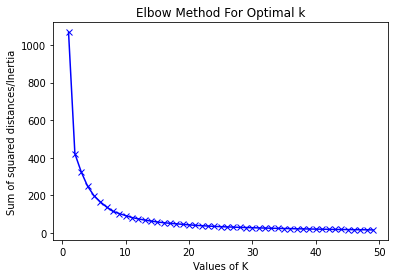

In [19]:
Sum_of_squared_distances = []
K = range(1,50)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data_frame)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [20]:
# df.columns

In [21]:
# df.describe()

In [22]:
# df.isnull().sum()

In [23]:
# df = df.drop(['Unnamed: 0', 'Domestic','Beat','District','Case Number','IUCR','Description','Community Area','FBI Code','X Coordinate', 'Y Coordinate', 'Updated On'], axis = 1)
# df = df.dropna()

In [24]:
# d=df.groupby('Primary Type').sum()["Arrest"]
# d

In [25]:
# plt.style.use(plt.style.available[9])
# plt.figure(figsize=(8,8))
# plt.pie(
#     df.groupby('Primary Type').sum()["Arrest"],
#     labels=df.groupby("Primary Type").sum().index,
#     radius=1, 
#     autopct='%0.1f%%', )
#     #explode=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
# plt.title('test', fontdict={'fontsize': 16})
# plt.show()

In [26]:
# df.loc[df['Year'] == 2002]